# Example notebook
 This notebook contains demo for how each module works and expected outputs
### Part 1 - Get everything ready
Importing modules

In [1]:
import sys
sys.path.append('..')
from formulation.modules import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Reading data

In [2]:
data = pd.read_csv("../formulation/data/FDA_APPROVED.csv")

Defining which features to be used as inputs and outputs

In [3]:
NEEDED = ['% Excreted Unchanged in Urine', 'CLogP', 'HBA', 'HBD', 'PSA', 'Formulation']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

## Part 2 - Train the model

Eliminating data points with missing values (NaN) and splitting data into train and test sets

In [4]:
clean_data = predict_missing_value.data_dropna(data, NEEDED, NEEDED)
train, test = train_test_split(clean_data, test_size=0.1, random_state=1010)

`classification.predict` function takes in training data and inside the training data, 10% will be used as validation set.  
During training, the function will print out feature importance and accuracy on the validation set

In [5]:
model = classification.predict(train[INPUTS], train[OUTPUT])

Accuracy: 0.6142857142857143

 Feature Importance 
 PSA                              0.303958
CLogP                            0.267697
% Excreted Unchanged in Urine    0.186334
HBA                              0.142195
HBD                              0.099816
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.67      0.12      0.20        17
    solution       0.40      0.36      0.38        11
     tablets       0.65      0.88      0.75        42

    accuracy                           0.61        70
   macro avg       0.57      0.45      0.44        70
weighted avg       0.61      0.61      0.56        70

The predict Classicifation for all 
 ['tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'solution' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 't

Using the trained model to predict formulation by calling `predict.predict`

In [6]:
predict.predict(model, test[INPUTS])

array(['tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'solution', 'tablets', 'tablets', 'tablets', 'capsules', 'tablets',
       'tablets', 'tablets', 'tablets', 'solution', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'solution',
       'tablets', 'solution', 'tablets', 'tablets', 'capsules',
       'solution', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'solution', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'solution', 'tablets', 'tablets', 'solution',
       'capsules', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'solution',
       'tablets', 'tablets', 'tablets', 'tablets', 'tablets', 'tablets',
       'tablets'], dtype=object)

## Part 3 - Fill missing value

Sometime, there might be missing values in data set. We can either drop those data or use other methods to fill those data. For example, some features like dose value and percent excreted in urine are easily available but solubility coefficients aren’t. Also, some features are directly relevant to our label, like these 3 features while other features like HBA, HBD, MW are not directly related to the label but they can be good predictors for solubility coefficients. Therefore, we can use these features to fill missing values in solubility parameters.

In [7]:
NEEDED = ['MW Drug', 'MW Sol', 'CLogP', 'HBA', 'HBD', 'PSDA', 'ALOGPS 2.1 solubility', 'Measured LogD74']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

filled_data = predict_missing_value.fill_missing_value(data, NEEDED, INPUTS, OUTPUT)


NEEDED = ['MW Drug', 'MW Sol', 'CLogP', 'HBA', 'HBD', 'PSDA', 'ALOGPS 2.1 solubility', 'Measured LogS (molar)']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

filled_data = predict_missing_value.fill_missing_value(filled_data, NEEDED, INPUTS, OUTPUT)

Coefficient of determination on testing set: 0.49
Mean squared error on testing set: 3.06
Coefficient of determination on testing set: 0.28
Mean squared error on testing set: 2.45


Use the filled data to train a new model

In [8]:
NEEDED = ['% Excreted Unchanged in Urine', 'CLogP', 'Measured LogD74', 'Measured LogS (molar)', 'PSA', 'Formulation']
INPUTS = NEEDED[:-1]
OUTPUT = NEEDED[-1]

clean_data = predict_missing_value.data_dropna(filled_data, NEEDED, NEEDED)

new_model = classification.predict(clean_data[INPUTS], clean_data[OUTPUT])

Accuracy: 0.6493506493506493

 Feature Importance 
 PSA                              0.270458
Measured LogD74                  0.205633
Measured LogS (molar)            0.194409
CLogP                            0.187827
% Excreted Unchanged in Urine    0.141673
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.50      0.08      0.14        12
    solution       0.62      0.29      0.40        17
     tablets       0.66      0.92      0.77        48

    accuracy                           0.65        77
   macro avg       0.59      0.43      0.44        77
weighted avg       0.63      0.65      0.59        77

The predict Classicifation for all 
 ['tablets' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'solution' 'tablets' 

In [9]:
name_list = ['capsules', 'solution', 'tablets', 'overall accuracy']
original_accuracy = [0.67, 0.40, 0.65, 0.61]
after_accuracy = [0.50, 0.62, 0.66, 0.65]

Make a bar plot to contrast accuracy before and after filling missing data

([<matplotlib.axis.XTick at 0x7f8e802e74d0>,
 <a list of 4 Text xticklabel objects>)

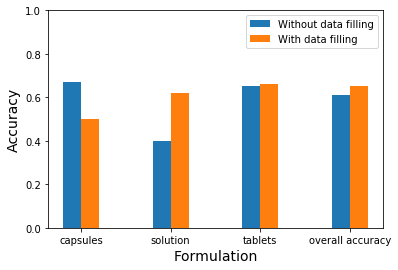

In [10]:
width = 0.2

#plt.figure(figsize=(5, 3), dpi=600)

x = np.arange(len(original_accuracy))
plt.bar(x, original_accuracy, width=width, label='Without data filling')

x = x + width
plt.bar(x, after_accuracy, width=width, label='With data filling', )

plt.legend()
plt.title("",size=12)
plt.ylabel('Accuracy', size=14)
plt.ylim(0, 1)
plt.xlabel('Formulation', size=14)
plt.xticks(ticks=x-width/2, labels=name_list)

## Part 4 - Choose best predictors

By choosing different input factors, the accuracy could be different. 

In [11]:
classification.determine_new_accuracy(3, clean_data[INPUTS], clean_data[OUTPUT])

Accuracy: 0.6233766233766234

 Feature Importance 
 PSA                      0.371666
Measured LogD74          0.324485
Measured LogS (molar)    0.303849
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.25      0.17      0.20        12
    solution       0.71      0.29      0.42        17
     tablets       0.66      0.85      0.75        48

    accuracy                           0.62        77
   macro avg       0.54      0.44      0.45        77
weighted avg       0.61      0.62      0.59        77

The predict Classicifation for all 
 ['capsules' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'tablets' 'tablets' 'tablets' 'solution'
 'tablets' 'capsules' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'solution' 'tablets' 'tablets'
 'tablets' 'solution' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 't

0.6493506493506493

In [12]:
classification.determine_new_accuracy(3, clean_data[NEEDED[:-2]], clean_data[OUTPUT])

Accuracy: 0.6623376623376623

 Feature Importance 
 Measured LogD74          0.342122
CLogP                    0.336454
Measured LogS (molar)    0.321425
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.50      0.17      0.25        12
    solution       0.67      0.24      0.35        17
     tablets       0.67      0.94      0.78        48

    accuracy                           0.66        77
   macro avg       0.61      0.45      0.46        77
weighted avg       0.64      0.66      0.60        77

The predict Classicifation for all 
 ['tablets' 'capsules' 'tablets' 'tablets' 'tablets' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'solution' 'solution' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'solution' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 'cap

0.6623376623376623

In [13]:
classification.determine_new_accuracy(3, clean_data[NEEDED[1:5]], clean_data[OUTPUT])

Accuracy: 0.6493506493506493

 Feature Importance 
 PSA                      0.369939
Measured LogD74          0.323903
Measured LogS (molar)    0.306158
dtype: float64

 Classicifation report
               precision    recall  f1-score   support

    capsules       0.25      0.17      0.20        12
    solution       0.75      0.35      0.48        17
     tablets       0.69      0.88      0.77        48

    accuracy                           0.65        77
   macro avg       0.56      0.46      0.48        77
weighted avg       0.63      0.65      0.62        77

The predict Classicifation for all 
 ['capsules' 'tablets' 'tablets' 'tablets' 'capsules' 'tablets' 'solution'
 'tablets' 'solution' 'tablets' 'solution' 'tablets' 'tablets' 'solution'
 'tablets' 'capsules' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 'tablets' 'tablets' 'solution' 'solution' 'tablets'
 'tablets' 'solution' 'tablets' 'tablets' 'capsules' 'tablets' 'tablets'
 'tablets' 'tablets' 

0.6233766233766234

## Part 5 - Choose best hyperparameters

In [14]:
max_depth = range(1, 5)
n_trees = range(1, 200, 50)
results = cross_validate.cross_validate_grid_search(
            [max_depth, n_trees], clean_data[INPUTS], clean_data[OUTPUT].to_frame())

max depth: 1, n_estimators: 1, accuracy: 0.658117
max depth: 1, n_estimators: 51, accuracy: 0.664627
max depth: 1, n_estimators: 101, accuracy: 0.669874
max depth: 1, n_estimators: 151, accuracy: 0.671172
max depth: 2, n_estimators: 1, accuracy: 0.645096
max depth: 2, n_estimators: 51, accuracy: 0.671172
max depth: 2, n_estimators: 101, accuracy: 0.676401
max depth: 2, n_estimators: 151, accuracy: 0.676384
max depth: 3, n_estimators: 1, accuracy: 0.643729
max depth: 3, n_estimators: 51, accuracy: 0.676384
max depth: 3, n_estimators: 101, accuracy: 0.673770
max depth: 3, n_estimators: 151, accuracy: 0.675068
max depth: 4, n_estimators: 1, accuracy: 0.638602
max depth: 4, n_estimators: 51, accuracy: 0.665926
max depth: 4, n_estimators: 101, accuracy: 0.671155
max depth: 4, n_estimators: 151, accuracy: 0.673753
Best accuracy for solution: 0.385093
Best accuracy for capsules: 0.069715
Best accuracy for tablets: 0.797468
Best accuracy for total: 0.676401


In [15]:
best_for_total = results[0]
best_for_solution = results[1]
best_for_capsules = results[2]
best_for_tablets = results[3]

print('Best max_depth: {:d}, best n_estimators: {:d}'.format(
                    best_for_total[0], best_for_total[1]))
print('Best parameter for solution catogory:', best_for_solution)
print('Best parameter for capsules catogory:', best_for_capsules)
print('Best parameter for tablets catogory:', best_for_tablets)

Best max_depth: 2, best n_estimators: 101
Best parameter for solution catogory: [3, 51]
Best parameter for capsules catogory: [4, 1]
Best parameter for tablets catogory: [2, 151]
